<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Aula_1_Explora%C3%A7%C3%A3o_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [ ]:
!pip install pycep-correios

In [251]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

# Carregamento dos CSVs

In [252]:
import pandas as pd
import plotly.express as px

In [253]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_sellers_dataset.csv')

# Exploração Datasets

## Dataset Clientes - olist_customers_dataset

In [254]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


### Informação - Estrutura da tabela

In [255]:
# Tamanho do dataset
df_clientes.shape

(99441, 5)

In [256]:
# valores unicos em cada coluna
df_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [257]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores não nulos na coluna
# size = qtd. de elemetos
df_clientes.agg(['nunique', 'count', 'size'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


### Informação - Negócio

In [258]:
# Quantas cidades diferentes temos no dataset
print(f'Número de cidades únicas: {len(df_clientes.customer_city.unique())}')

Número de cidades únicas: 4119


In [259]:
# Quantos estados diferentes temos no dataset
print(f'Número de estados únicos: {len(df_clientes.customer_state.unique())}')

Número de estados únicos: 27


In [260]:
# Total de clientes
print(f'Número de clientes únicos: {df_clientes.customer_unique_id.nunique()}')

Número de clientes únicos: 96096


In [261]:
# Total de clientes por cidade
df_clientes_unicos = df_clientes.drop_duplicates('customer_unique_id')
df_clientes_unicos.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Cidades

In [262]:
df_top5_cidades = df_clientes_unicos.customer_city.value_counts().head(5)
df_top5_cidades

sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
Name: customer_city, dtype: int64

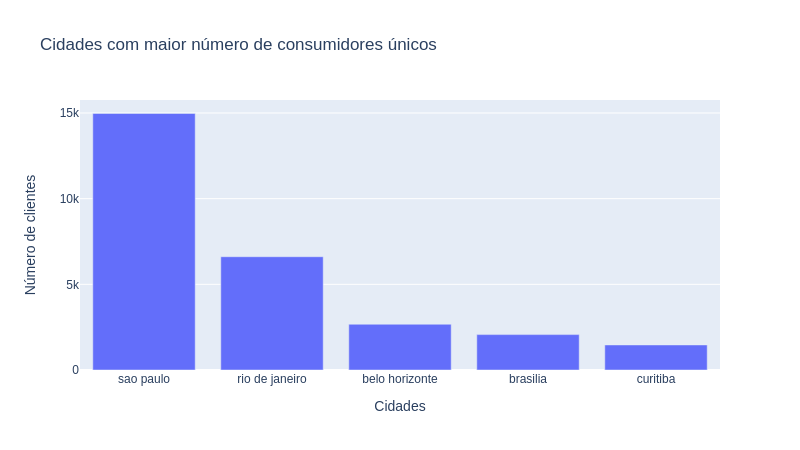

In [263]:
fig = px.bar(df_top5_cidades, y='customer_city', labels={'customer_city': 'Número de clientes', 'index': 'Cidades'}, title='Cidades com maior número de consumidores únicos')
gitly.show(fig)

Estados

In [264]:
df_top5_estados = df_clientes_unicos.customer_state.value_counts().head(5)
df_top5_estados

SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
Name: customer_state, dtype: int64

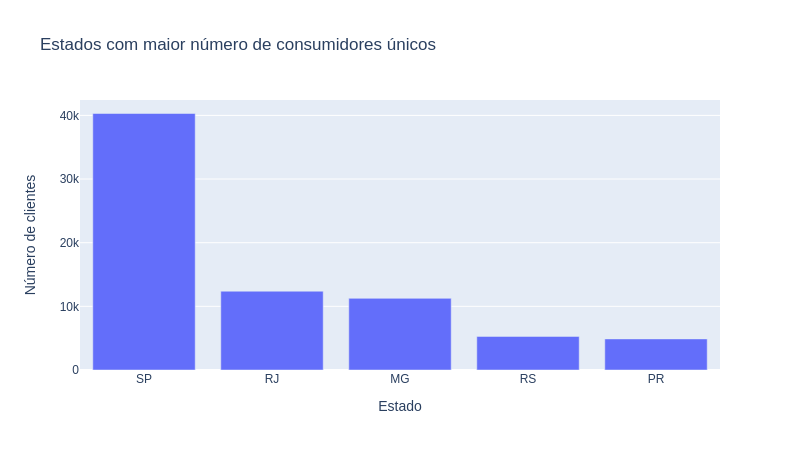

In [265]:
fig = px.bar(df_top5_estados, y='customer_state', labels={'customer_state': 'Número de clientes', 'index': 'Estado'}, title='Estados com maior número de consumidores únicos')
gitly.show(fig)

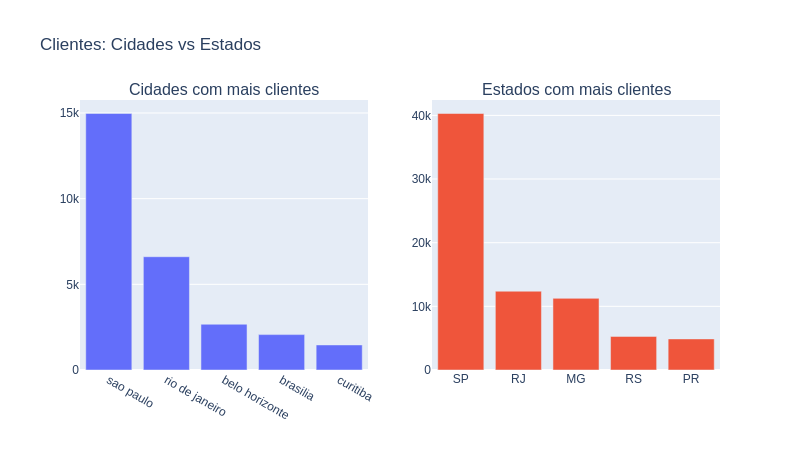

In [266]:
from plotly.subplots import make_subplots

fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )

fig.add_bar(x=df_top5_cidades.index, y=df_top5_cidades, row=1, col=1)
fig.add_bar(x=df_top5_estados.index, y=df_top5_estados, row=1, col=2)
fig.update_layout(dict({'title':'Clientes: Cidades vs Estados'}))
fig.update_layout(dict({'showlegend':False}))
gitly.show(fig)

Bairro/Distrito

In [267]:
df_top4_bairros = df_clientes_unicos.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [268]:
import pycep_correios

def bairro_cidade(cep):
    end = pycep_correios.get_address_from_cep(str(cep) + '000')
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply(bairro_cidade)
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


## Dataset Produtos - olist_products_dataset

In [269]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### Informação - Estrutura da tabela

In [270]:
# Tamanho do dataset
df_produtos.shape

(32951, 9)

In [271]:
df_produtos.agg(['nunique', 'count', 'size'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [272]:
df_produtos.product_category_name.fillna(value='nao informado', inplace=True)
df_produtos.agg(['nunique', 'count', 'size'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


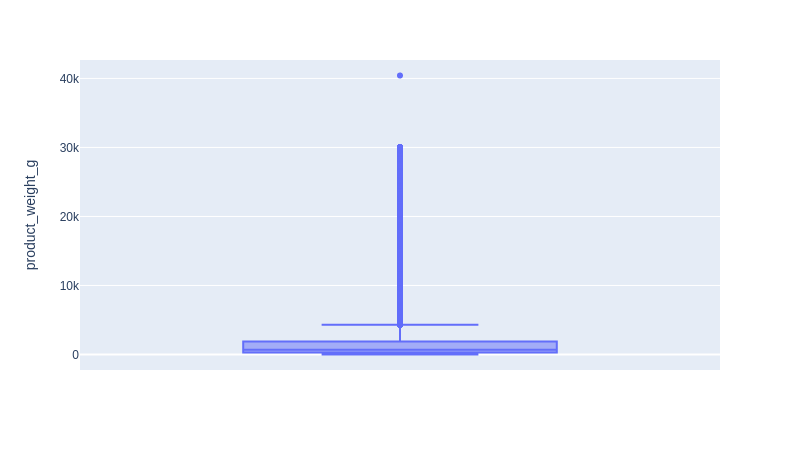

In [273]:
# Como está a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g")
gitly.show(fig)

In [274]:
#df_produtos.fillna(method='ffil')
#df_produtos.fillna(value=0)
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor,inplace=True)

### Informação - Negócio

In [275]:
# Número de categorias
print(f'Número de categorias: {len(df_produtos.product_category_name.unique())}')

Número de categorias: 74


In [276]:
# Categorias mais ofertadas
df_categoria = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categoria

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

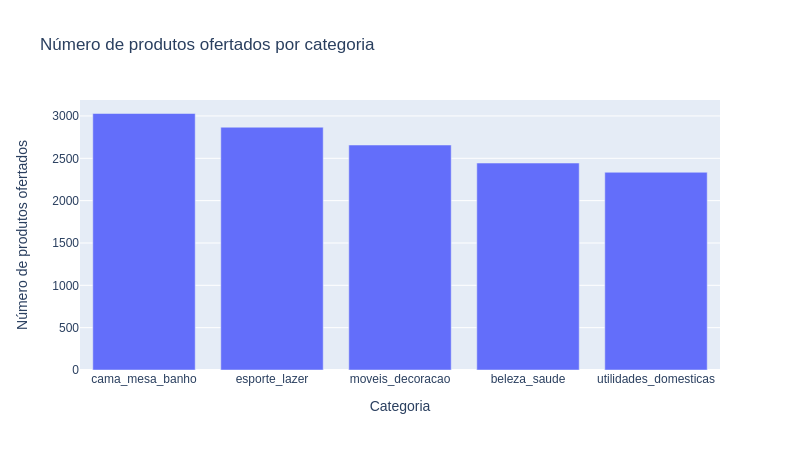

In [277]:
fig = px.bar(df_categoria, y='qtd_prod_cat_ofertados', labels={'qtd_prod_cat_ofertados': 'Número de produtos ofertados', 'index': 'Categoria'}, title='Número de produtos ofertados por categoria')
gitly.show(fig)

In [278]:
# Peso médio dos produtos
print(f'Peso médio dos produtos: {df_produtos.product_weight_g.mean()/1000:.2f}kg')

Peso médio dos produtos: 2.28kg


In [279]:
import numpy as np

df_peso_medio_prods = df_produtos.groupby(by = 'product_category_name').apply(np.mean).product_weight_g
df_peso_medio_prods.head(5)

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
Name: product_weight_g, dtype: float64

In [280]:
df_mais_ofer_peso_medio = pd.merge(left=df_categoria, right=df_peso_medio_prods, how='left', left_index=True, right_index=True)
df_mais_ofer_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


In [281]:
# Comprimento médio dos produtos
print(f'Comprimento médio dos produtos: {df_produtos.product_length_cm.mean():.2f}cm')

Comprimento médio dos produtos: 30.82cm


In [282]:
# Altura média dos produtos
print(f'Altura média dos produtos: {df_produtos.product_height_cm.mean():.2f}cm')

Altura média dos produtos: 16.94cm


In [283]:
# Largura média dos produtos
print(f'Largura média dos produtos: {df_produtos.product_width_cm.mean():.2f}cm')

Largura média dos produtos: 23.20cm


In [284]:
# Volume médio dos produtos
df_produtos['product_volume_cm3'] = df_produtos.product_length_cm*df_produtos.product_height_cm*df_produtos.product_width_cm
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0


In [285]:
df_vol_medio_prods = df_produtos.groupby(by = 'product_category_name').apply(np.mean).product_volume_cm3
df_vol_medio_prods.head(3)

product_category_name
agro_industria_e_comercio    37604.229730
alimentos                     6634.121951
alimentos_bebidas             7947.163462
Name: product_volume_cm3, dtype: float64

In [286]:
df_mais_ofer_peso_volume_medio = pd.merge(left=df_mais_ofer_peso_medio, right=df_vol_medio_prods, how='left', left_index=True, right_index=True)
df_mais_ofer_peso_volume_medio

,qtd_prod_cat_ofertados,product_weight_g,product_volume_cm3
cama_mesa_banho,3029,2456.405084,18594.577088
esporte_lazer,2867,2024.670736,14725.348797
moveis_decoracao,2657,3008.266842,22481.225442
beleza_saude,2444,1434.793781,10468.159165
utilidades_domesticas,2335,3020.793576,21904.167880


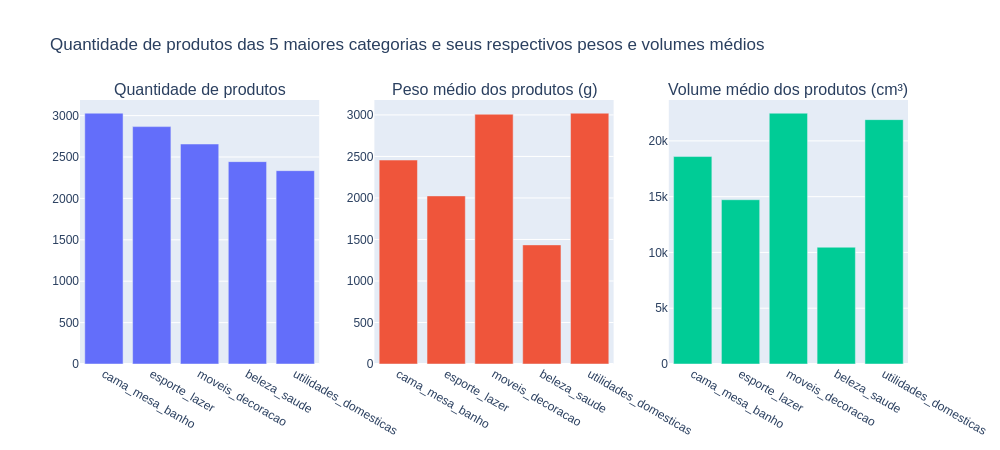

In [287]:
fig = make_subplots(rows=1, cols=3, column_titles= ['Quantidade de produtos', 'Peso médio dos produtos (g)', 'Volume médio dos produtos (cm³)'])

fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.qtd_prod_cat_ofertados, row=1, col=1)
fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.product_weight_g, row=1, col=2)
fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.product_volume_cm3, row=1, col=3)
fig.update_layout(dict({'title':'Quantidade de produtos das 5 maiores categorias e seus respectivos pesos e volumes médios'}))
fig.update_layout(dict({'showlegend':False}))
gitly.show(fig, width = 1000)

## Dataset Compras - olist_orders_dataset

In [288]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### Informação - Estrutura da tabela

In [289]:
# Tamanho do dataset
df_compras.shape

(99441, 8)

In [290]:
df_compras.agg(['nunique', 'count', 'size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [291]:
df_compras.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [292]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(2)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered


In [293]:
lista_colunas_datas = list(df_compras.iloc[:1, 3:].columns)
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [294]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime(df_compras[coluna], format='%Y-%m-%d')

df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [295]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [296]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

In [297]:
media_compra_confirm = (df_compras_dt.order_approved_at - df_compras_dt.order_purchase_timestamp).mean().round('S')
media_compra_confirm

Timedelta('0 days 10:25:09')

In [298]:
df_compras_dt.order_approved_at.fillna(value=df_compras_dt.order_purchase_timestamp + media_compra_confirm, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,81018,95664,459
count,99441,99441,99441,99441,99441,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [299]:
media_aprov_transp = (df_compras_dt.order_delivered_carrier_date - df_compras_dt.order_approved_at).mean().round('S')
media_aprov_transp

Timedelta('2 days 19:19:34')

In [300]:
df_compras_dt.order_delivered_carrier_date.fillna(value=df_compras_dt.order_approved_at + media_aprov_transp, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82795,95664,459
count,99441,99441,99441,99441,99441,99441,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [301]:
media_transp_deliv = (df_compras_dt.order_delivered_customer_date - df_compras_dt.order_delivered_carrier_date).mean().round('S')
media_transp_deliv

Timedelta('9 days 07:56:35')

In [302]:
df_compras_dt.order_delivered_customer_date.fillna(value=df_compras_dt.order_delivered_carrier_date + media_transp_deliv, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82795,98617,459
count,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


### Informação - Negócio

In [303]:
df_compras_dt.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [304]:
# Tipos e quantidade do status do pedido
df_status = df_compras_dt.order_status.value_counts()
df_status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

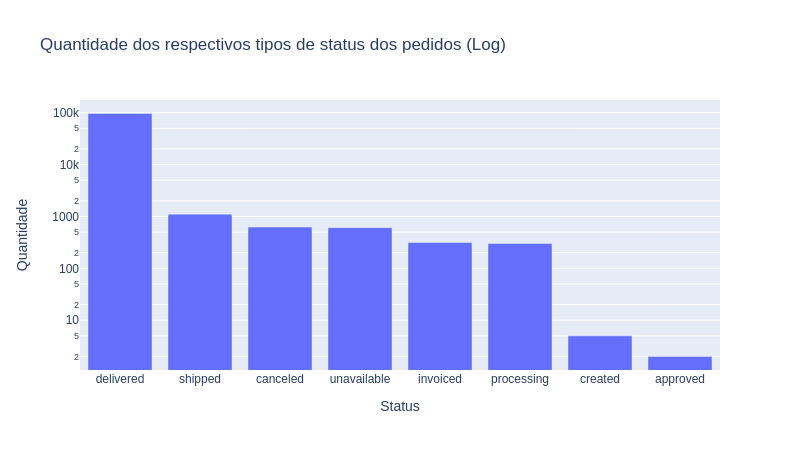

In [305]:
fig = px.bar(df_status, y='order_status', log_y=True, labels={'order_status': 'Quantidade', 'index': 'Status'}, 
             title= 'Quantidade dos respectivos tipos de status dos pedidos (Log)')
gitly.show(fig)

In [306]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

91318

In [307]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [308]:
atrasados = total - em_tempo
atrasados

8123

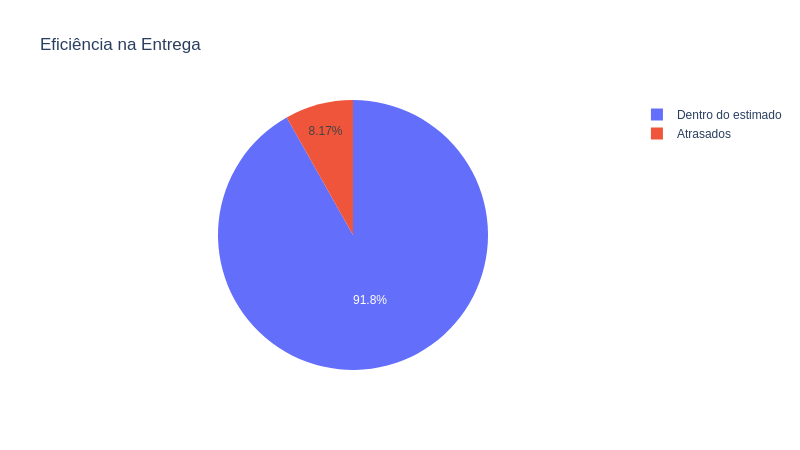

In [309]:
fig = px.pie(values=[em_tempo,atrasados], names=['Dentro do estimado', 'Atrasados'], title='Eficiência na Entrega')
gitly.show(fig)

In [310]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [311]:
df_compras_dt['numeric_month'] = df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] = df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] = df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [312]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [313]:
df_compras_mes = df_compras_dt[['numeric_month','year','days_delivery_interval']].groupby(by='numeric_month').apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,13.464370
2,2.0,2017.790785,15.623531
3,3.0,2017.728899,14.847064
4,4.0,2017.742695,11.894681
5,5.0,2017.650052,10.924336
6,6.0,2017.655227,9.752975
7,7.0,2017.609808,9.595077
8,8.0,2017.600572,8.743890
9,9.0,2017.002787,11.468060


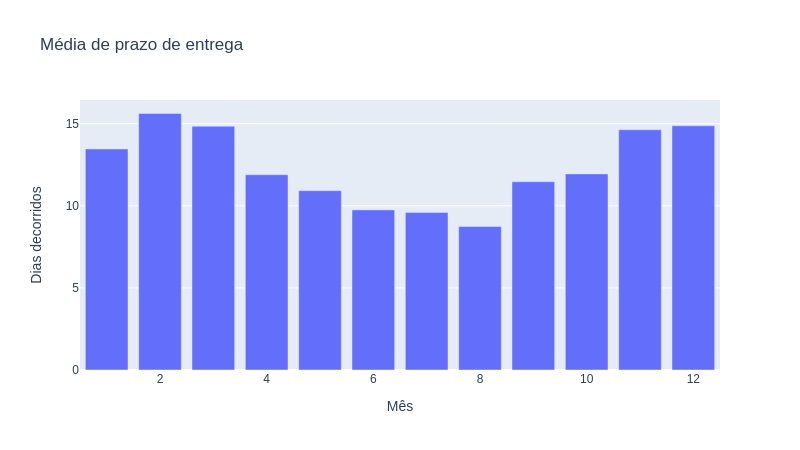

In [314]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', 
             labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'})
gitly.show(fig)

In [315]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


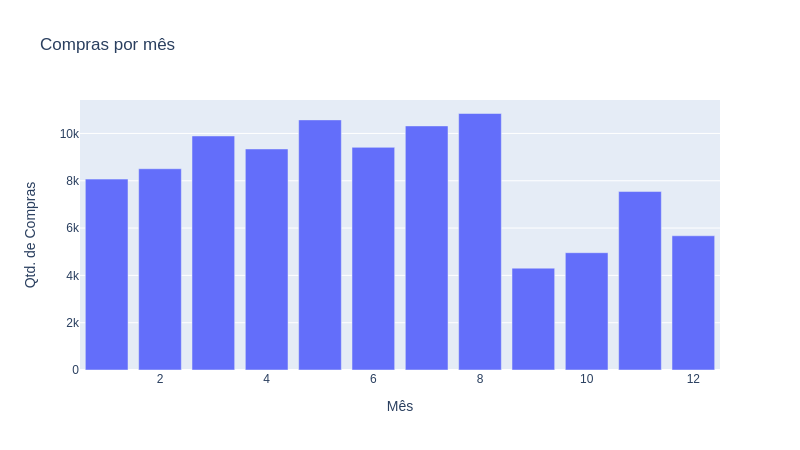

In [316]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mês', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'})
gitly.show(fig)

In [317]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [318]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

## Dataset Itens - olist_order_items_dataset

In [319]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


### Informação - Estrutura da tabela

In [320]:
# Tamanho do dataset
df_compra_itens.shape

(112650, 7)

In [321]:
df_compra_itens.agg(['nunique','count','size'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
nunique,98666,21,32951,3095,93318,5968,6999
count,112650,112650,112650,112650,112650,112650,112650
size,112650,112650,112650,112650,112650,112650,112650


### Informação - Negócio

In [322]:
# Número de pedidos únicos
print(f'Número de pedidos: {len(df_compra_itens.order_id.unique())}')

Número de pedidos: 98666


In [323]:
# Número de produtos
print(f'Número de produtos: {len(df_compra_itens.product_id.unique())}')

Número de produtos: 32951


In [324]:
# Quantidade de vendedores
print(f'Número de vendedores: {len(df_compra_itens.seller_id.unique())}')

Número de vendedores: 3095


In [325]:
# Preço médio das compras
print(f'Preço médio de todas as compras: R${df_compra_itens.price.mean():.2f}')

Preço médio de todas as compras: R$120.65


In [326]:
# Preço médio do frete das compras
print(f'Preço médio do frete de todas as compras: R${df_compra_itens.freight_value.mean():.2f}')

Preço médio do frete de todas as compras: R$19.99


In [327]:
# Preço médio total das compras (preço do produto + frete)
preço_total = df_compra_itens.price.mean() + df_compra_itens.freight_value.mean()
print(f'Preço médio total da compra: R${preço_total:.2f}')

Preço médio total da compra: R$140.64


### Produto mais vendido

In [328]:
df_prod_mais_v = df_compra_itens[['product_id', 'order_item_id']].groupby(by='product_id').apply(sum)['order_item_id']
df_prod_mais_v.head()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    2
000d9be29b5207b54e86aa1b1ac54872    1
Name: order_item_id, dtype: int64

In [329]:
df_prod_mais_v.sort_values(ascending=False).head(5)

product_id
422879e10f46682990de24d770e7f83d    793
aca2eb7d00ea1a7b8ebd4e68314663af    640
368c6c730842d78016ad823897a372db    551
53759a2ecddad2bb87a079a1f1519f73    545
99a4788cb24856965c36a24e339b6058    542
Name: order_item_id, dtype: int64

### Frete médio do produto mais vendido

In [330]:
prod_mais = df_prod_mais_v.sort_values(ascending=False).index[0]
df_prod_mais_vendido = df_compra_itens[ df_compra_itens.product_id == prod_mais ]
df_prod_mais_vendido.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.90,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.90,0.00
775,01c4f4e08d9e8b7c5bd47e612285993f,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 04:30:35,49.00,13.41
869,0204196a1fd266bdc00356eb791b4516,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 18:54:28,49.00,17.64
870,0204196a1fd266bdc00356eb791b4516,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 18:54:28,49.00,17.64
1002,02556030d826438ef986ab5fd723a9a5,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-02-16 10:48:11,49.90,19.59
1003,02556030d826438ef986ab5fd723a9a5,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-02-16 10:48:11,49.90,19.59
1068,027ae252d37e5527c2e109e268b222e2,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-24 22:18:42,53.90,14.47
1161,02b2c02d27d60c0e658675335ca80216,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-08-10 13:10:18,59.90,17.67
1340,03202c9906e9d1140a8ac3e15f4492e8,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-08-09 04:44:41,49.91,20.99


In [331]:
df_prod_mais_vendido.freight_value.describe()

count    484.000000
mean      15.752149
std        8.358141
min        0.000000
25%       13.430000
50%       17.630000
75%       17.670000
max       83.270000
Name: freight_value, dtype: float64

In [332]:
fig = px.box(df_prod_mais_vendido, y="freight_value")
fig.show()

### Produto com maior faturamento

In [333]:
df_compra_itens['valor_final'] = df_compra_itens.order_item_id * df_compra_itens.price
df_compra_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


In [334]:
df_prod_mais_f = df_compra_itens[['product_id','order_item_id', 'valor_final']].groupby(by='product_id').apply(sum)[['valor_final','order_item_id']]
df_prod_mais_f.head()

,valor_final,order_item_id
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,1
00088930e925c41fd95ebfe695fd2655,129.90,1
0009406fd7479715e4bef61dd91f2462,229.00,1
000b8f95fcb9e0096488278317764d19,117.80,2
000d9be29b5207b54e86aa1b1ac54872,199.00,1


In [335]:
df_prod_mais_f.sort_values(by = 'valor_final', ascending=False).head(5)

,valor_final,order_item_id
product_id,,
bb50f2e236e5eea0100680137654686c,70485.00,215
5769ef0a239114ac3a854af00df129e4,60480.00,36
6cdd53843498f92890544667809f1595,57557.60,164
d1c427060a0f73f6b889a5c7c61f2ac4,50940.39,369
d6160fb7873f184099d9bc95e30376af,48899.34,35


### Top 5 vendedores (+vendem)

In [336]:
# Transações
df_vendas = df_compra_itens.seller_id.value_counts().head(5)
df_vendas

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [337]:
# Produtos
df_compra_itens.groupby(by=['seller_id']).apply(sum).sort_values(by=['order_item_id'], ascending=False).head(5)['order_item_id']

seller_id
1f50f920176fa81dab994f9023523100    2898
1025f0e2d44d7041d6cf58b6550e0bfa    2290
4a3ca9315b744ce9f8e9374361493884    2269
6560211a19b47992c3666cc44a7e94c0    2261
7c67e1448b00f6e969d365cea6b010ab    2172
Name: order_item_id, dtype: int64

## Dataset Vendedores - olist_sellers_dataset

In [338]:
df_vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


### Informação - Estrutura da tabela

In [339]:
# Tamanho do dataset
df_vendedores.shape

(3095, 4)

In [340]:
df_vendedores.agg(['nunique','count','size'])

,seller_id,seller_zip_code_prefix,seller_city,seller_state
nunique,3095,2246,611,23
count,3095,3095,3095,3095
size,3095,3095,3095,3095


### Informação - Negócio

In [341]:
# Total de cidades dos vendedores
print(f'Total de cidades dos vendedores cadastradas: {len(df_vendedores.seller_city.unique())}')

Total de cidades dos vendedores cadastradas: 611


In [342]:
# Total de estados dos vendedores
print(f'Total de estados dos vendedores cadastradas: {len(df_vendedores.seller_state.unique())}')

Total de estados dos vendedores cadastradas: 23


## Dataset Reviews - olist_order_reviews_dataset

In [343]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


### Informação - Estrutura da tabela

In [344]:
# Tamanho do dataset
df_reviews.shape

(100000, 7)

In [345]:
df_reviews.agg(['nunique','count','size'])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
nunique,99173,99441,5,4600,36921,637,99010
count,100000,100000,100000,11715,41753,100000,100000
size,100000,100000,100000,100000,100000,100000,100000


### Informação - Negócio

In [346]:
df_reviews.review_id.value_counts().head(5)

70509c441d994fa03d6c1457930c9024    3
f4bb9d6dd4fb6dcc2298f0e7b17b8e1e    3
4548534449b1f572e357211b90724f1b    3
dbdf1ea31790c8ecfcc6750525661a9b    3
ddc52555ca27b0fe67d5255147682d2d    3
Name: review_id, dtype: int64

In [347]:
df_reviews_unicos = df_reviews.drop_duplicates('review_id')
df_reviews_unicos.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [348]:
df_notas = df_reviews_unicos.review_score.value_counts()
df_notas

5    57000
4    19062
1    11712
3     8203
2     3196
Name: review_score, dtype: int64

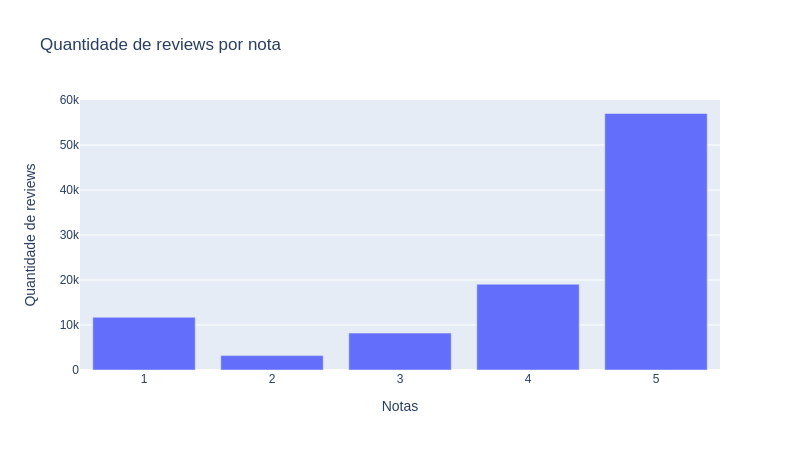

In [349]:
fig = px.bar(df_notas, y='review_score', title= 'Quantidade de reviews por nota',
             labels={'review_score': 'Quantidade de reviews', 'index': 'Notas'})
gitly.show(fig)

In [350]:
df_reviews_unicos_dt = df_reviews_unicos[['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message']].copy()
df_reviews_unicos_dt.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN


In [351]:
lista_datas = ['review_creation_date', 'review_answer_timestamp']

In [352]:
for coluna in lista_datas:
    df_reviews_unicos_dt[coluna] = pd.to_datetime(df_reviews_unicos[coluna], format='%Y-%m-%d')

df_reviews_unicos_dt.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24


In [353]:
df_reviews_unicos_dt.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [354]:
df_reviews_unicos_dt['time_answer_review'] = df_reviews_unicos_dt.review_answer_timestamp - df_reviews_unicos_dt.review_creation_date
df_reviews_unicos_dt.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,time_answer_review
60747,1691f9dc317a8524ea519290335dc60b,a91ddb87adec7ff29a8f3e814df0107b,5,Ótimo,Supriu minhas expectativas. É flexível e se aj...,2018-05-18,2018-05-20 14:43:42,2 days 14:43:42
83390,b2e2c42acd251c77a901ec687f8b1bb5,a7c94ed332c0c561f69399316f9eca6d,1,NaN,NaN,2018-04-13,2018-04-15 12:32:34,2 days 12:32:34
19314,c8ea3909ca05725103b22d4461a00630,b17ba1dc20f88334dd3f083464221a18,4,NaN,NaN,2018-06-12,2018-06-14 21:52:26,2 days 21:52:26


In [355]:
print(f"Tempo médio para resposta ao review {df_reviews_unicos_dt.time_answer_review.mean().round('S')}")

Tempo médio para resposta ao review 3 days 03:34:17


In [356]:
df_reviews_unicos_dt.time_answer_review.min()

Timedelta('0 days 02:08:29')

In [357]:
df_reviews_unicos_dt.time_answer_review.max()

Timedelta('518 days 16:46:52')

In [358]:
df_reviews_unicos_dt.time_answer_review.median()

Timedelta('1 days 16:09:04')

## Dataset Pagamentos - olist_order_payments_dataset

In [359]:
df_compra_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


### Informação - Estrutura da tabela

In [360]:
# Tamanho do dataset
df_compra_pagamentos.shape

(103886, 5)

In [361]:
df_compra_pagamentos.agg(['nunique','count','size'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
nunique,99440,29,5,24,29077
count,103886,103886,103886,103886,103886
size,103886,103886,103886,103886,103886


### Informação - Negócio

In [362]:
df_parcelas = df_compra_pagamentos.payment_installments.value_counts()
df_parcelas.head(8)

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
Name: payment_installments, dtype: int64

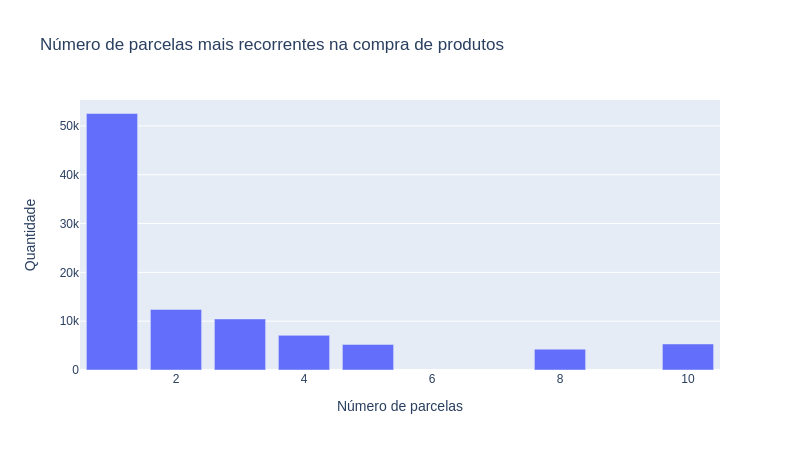

In [363]:
fig = px.bar(df_parcelas.head(7), y='payment_installments', title= 'Número de parcelas mais recorrentes na compra de produtos', 
             labels={'index': 'Número de parcelas', 'payment_installments': 'Quantidade'})
gitly.show(fig)

In [364]:
# Pagamento médio
print(f'Valor médio de pagamento total: R${df_compra_pagamentos.payment_value.mean():.2f}')

Valor médio de pagamento total: R$154.10


In [365]:
df_metodo_pag = df_compra_pagamentos.payment_type.value_counts()
df_metodo_pag

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

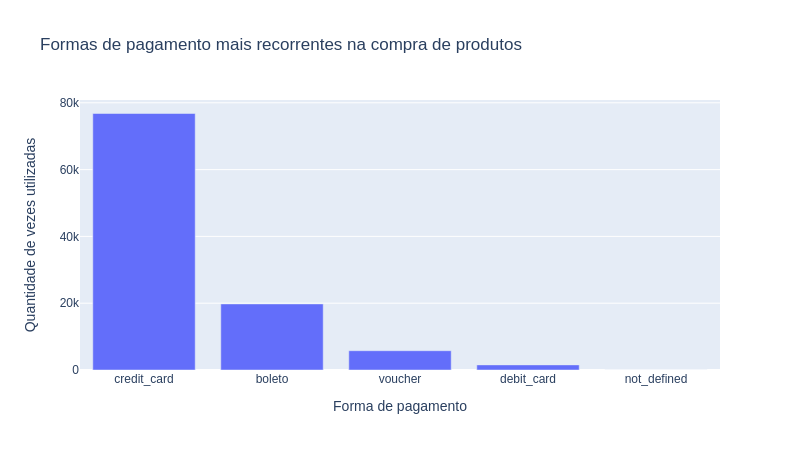

In [366]:
fig = px.bar(df_metodo_pag, y='payment_type', title= 'Formas de pagamento mais recorrentes na compra de produtos',
             labels = {'index':'Forma de pagamento', 'payment_type':'Quantidade de vezes utilizadas'})
gitly.show(fig)

In [367]:
# Parcelas por método de pagamento
df_compra_pagamentos.groupby(['payment_installments','payment_type']).count().head(8)

order_id  payment_sequential  payment_value
payment_installments payment_type                                             
0                    credit_card          2                   2              2
1                    boleto           19784               19784          19784
                     credit_card      25455               25455          25455
                     debit_card        1529                1529           1529
                     not_defined          3                   3              3
                     voucher           5775                5775           5775
2                    credit_card      12413               12413          12413
3                    credit_card      10461               10461          10461

## Dataset Geo - olist_geolocation_dataset

In [368]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


### Informação - Estrutura da tabela

In [369]:
# Tamanho do dataset
df_geo.shape

(1000163, 5)

In [370]:
df_geo.agg(['nunique','count','size'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
nunique,19015,717358,717613,8011,27
count,1000163,1000163,1000163,1000163,1000163
size,1000163,1000163,1000163,1000163,1000163


### Informação - Negócio

In [371]:
df_estados = df_geo.geolocation_state.value_counts()
df_estados.head(5)

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: geolocation_state, dtype: int64

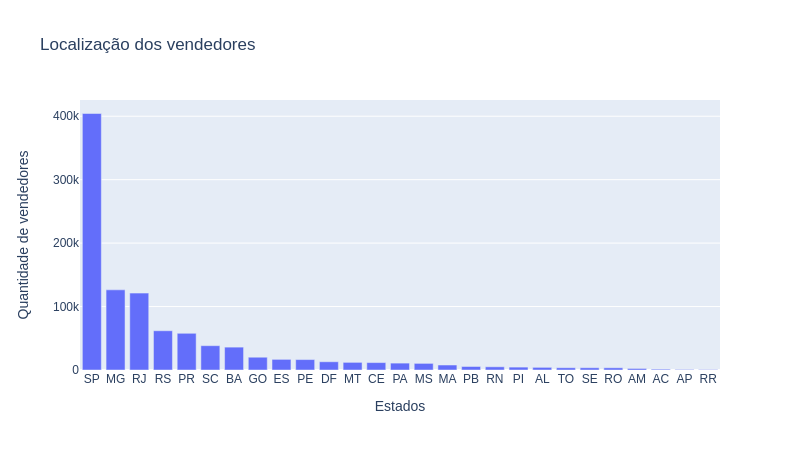

In [372]:
fig = px.bar(df_estados, y = 'geolocation_state', title='Localização dos vendedores',
             labels={'index':'Estados','geolocation_state':'Quantidade de vendedores'})
gitly.show(fig)

# Relacionamento entre tabelas

## Top 5 categorias mais vendidas (unidades vendidas)

In [373]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0


In [374]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,199.0


In [375]:
df_left = df_compra_itens[['order_item_id', 'product_id']]
df_left.head(3)

,order_item_id,product_id
0,1,4244733e06e7ecb4970a6e2683c13e61
1,1,e5f2d52b802189ee658865ca93d83a8f
2,1,c777355d18b72b67abbeef9df44fd0fd


In [376]:
df_right = df_produtos[['product_id','product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [377]:
df_prods_compra_itens = df_left.merge(df_right, how='left', on='product_id')
df_prods_compra_itens.head(5)

,order_item_id,product_id,product_category_name
0,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,1,7634da152a4610f1595efa32f14722fc,perfumaria
4,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [378]:
df_res = df_prods_compra_itens[['order_item_id', 'product_category_name']].groupby(by='product_category_name').sum()
df_res = df_res.sort_values(by = 'order_item_id',ascending = False).head(5)

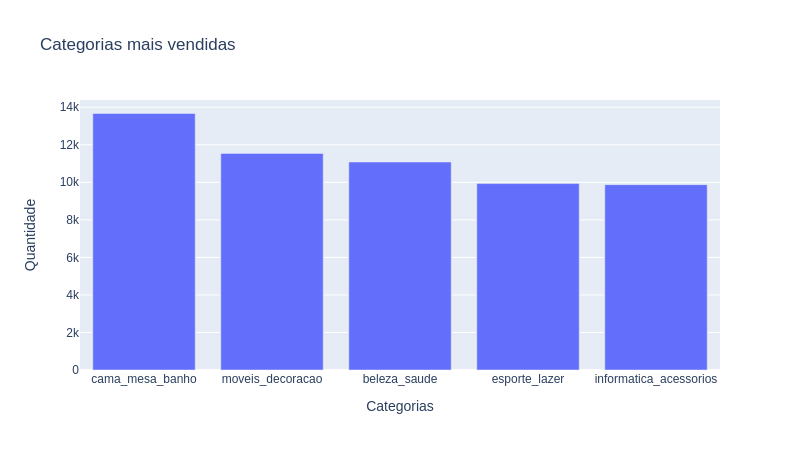

In [379]:
fig = px.bar(df_res, y = 'order_item_id', title='Categorias mais vendidas',labels={'order_item_id':'Quantidade','product_category_name':'Categorias'})
gitly.show(fig)

## Top 5 categorias com maior faturamento

In [380]:
df_left = df_compra_itens[['valor_final', 'product_id']]
df_left.head(3)

,valor_final,product_id
0,58.9,4244733e06e7ecb4970a6e2683c13e61
1,239.9,e5f2d52b802189ee658865ca93d83a8f
2,199.0,c777355d18b72b67abbeef9df44fd0fd


In [381]:
df_right = df_produtos[['product_id','product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [382]:
df_cat_fat = df_left.merge(df_right, how='left', on='product_id')
df_cat_fat.head(5)

,valor_final,product_id,product_category_name
0,58.90,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,239.90,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,199.00,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,12.99,7634da152a4610f1595efa32f14722fc,perfumaria
4,199.90,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [383]:
df_res = df_cat_fat[['valor_final', 'product_category_name']].groupby(by='product_category_name').sum()
df_res = df_res.sort_values(by = 'valor_final',ascending = False).head(5)
df_res

,valor_final
product_category_name,
beleza_saude,1347468.49
relogios_presentes,1259634.58
cama_mesa_banho,1228795.46
informatica_acessorios,1135454.64
esporte_lazer,1082435.42


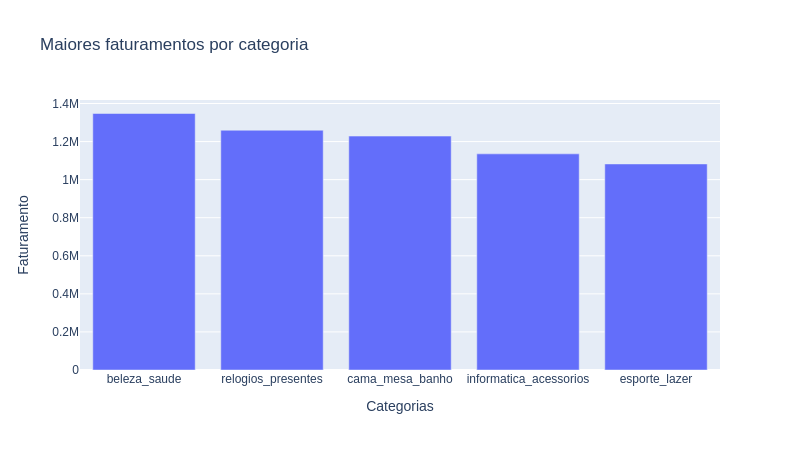

In [384]:
fig = px.bar(df_res, y = 'valor_final', title='Maiores faturamentos por categoria', labels={'valor_final':'Faturamento','product_category_name':'Categorias'})
gitly.show(fig)

## Top 5 maiores compradores (qunatidade de produtos)

In [385]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,199.0


In [386]:
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [387]:
df_left = df_compras_dt[['order_id', 'customer_id']]
df_left.head(3)

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089


In [388]:
df_right = df_compra_itens[['order_id', 'order_item_id']]
df_right.head(3)

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1


In [389]:
df_top5_compradores_qtd = df_left.merge(df_right, how='left', on='order_id')
df_top5_compradores_qtd.head(3)

,order_id,customer_id,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1.0


In [390]:
df_res = df_top5_compradores_qtd[['customer_id', 'order_item_id']].groupby(by='customer_id').sum()
df_res = df_res.sort_values(by = 'order_item_id', ascending=False).head(5)
df_res

,order_item_id
customer_id,
fc3d1daec319d62d49bfb5e1f83123e9,231.0
be1b70680b9f9694d8c70f41fa3dc92b,210.0
bd5d39761aa56689a265d95d8d32b8be,210.0
adb32467ecc74b53576d9d13a5a55891,120.0
10de381f8a8d23fff822753305f71cae,120.0


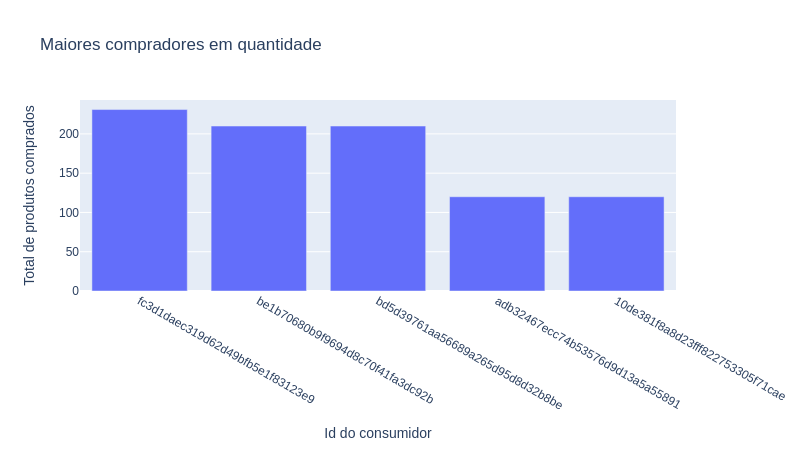

In [391]:
fig = px.bar(df_res, y = 'order_item_id', title='Maiores compradores em quantidade', labels={'order_item_id':'Total de produtos comprados','customer_id':'Id do consumidor'})
gitly.show(fig)

## Top 5 maiores compradores ($)

In [392]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,199.0


In [393]:
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [394]:
df_left = df_compras_dt[['order_id', 'customer_id']]
df_left.head(3)

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089


In [395]:
df_right = df_compra_itens[['order_id', 'valor_final']]
df_right.head(3)

,order_id,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,58.9
1,00018f77f2f0320c557190d7a144bdd3,239.9
2,000229ec398224ef6ca0657da4fc703e,199.0


In [396]:
df_top5_compradores = df_left.merge(df_right, how='left', on='order_id')
df_top5_compradores.head(3)

,order_id,customer_id,valor_final
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,159.90


In [397]:
df_res = df_top5_compradores[['customer_id', 'valor_final']].groupby(by='customer_id').sum()
df_res = df_res.sort_values(by = 'valor_final', ascending=False).head(5)

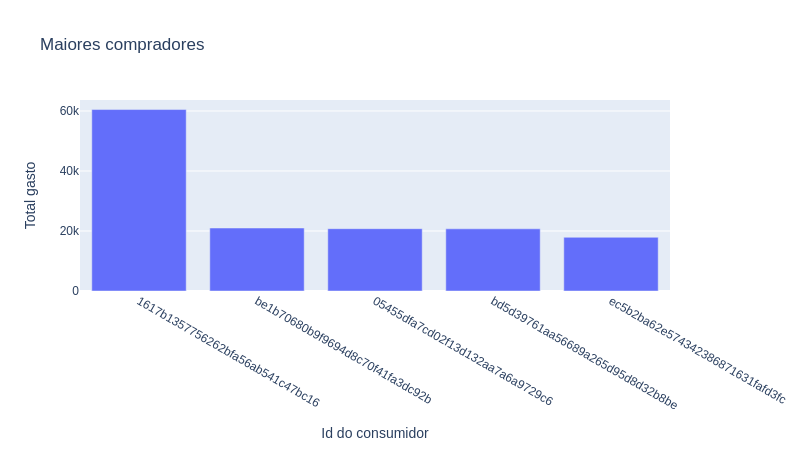

In [398]:
fig = px.bar(df_res, y = 'valor_final', title='Maiores compradores', labels={'valor_final':'Total gasto','customer_id':'Id do consumidor'})
gitly.show(fig)

# União das tabelas

In [399]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0


In [400]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,199.0


In [401]:
df_left = df_compra_itens[['order_id', 'product_id', 'seller_id', 'valor_final']]
df_left.head(3)

,order_id,product_id,seller_id,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0


In [402]:
df_right = df_produtos[['product_id', 'product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [403]:
df_compra_prods = df_left.merge(df_right, how='left', on='product_id')
df_compra_prods.head(3)

,order_id,product_id,seller_id,valor_final,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,moveis_decoracao


In [404]:
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [405]:
df_right = df_compras_dt[['order_id', 'customer_id', 'days_delivery_interval']]
df_right.head(3)

,order_id,customer_id,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9


In [406]:
df_compra_prods = df_compra_prods.merge(df_right, how='left', on='order_id')
df_compra_prods.head(3)

,order_id,product_id,seller_id,valor_final,product_category_name,customer_id,days_delivery_interval
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,cool_stuff,3ce436f183e68e07877b285a838db11a,7
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,16
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,7


In [407]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [408]:
df_right = df_reviews[['order_id', 'review_score']]
df_right.head(3)

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5


In [409]:
df_compra_prods_reviews = df_compra_prods.merge(df_right, how='left', on='order_id')
df_compra_prods_reviews.head(3)

,order_id,product_id,seller_id,valor_final,product_category_name,customer_id,days_delivery_interval,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,cool_stuff,3ce436f183e68e07877b285a838db11a,7,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,16,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,7,5


In [410]:
df_compra_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [411]:
df_right = df_compra_pagamentos[['order_id', 'payment_type', 'payment_installments']]
df_right.head(3)

,order_id,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1


In [412]:
df_compra_prods_reviews_pag = df_compra_prods_reviews.merge(df_right, how='left', on='order_id')
df_compra_prods_reviews_pag.head(3)

,order_id,product_id,seller_id,valor_final,product_category_name,customer_id,days_delivery_interval,review_score,payment_type,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,cool_stuff,3ce436f183e68e07877b285a838db11a,7,5,credit_card,2.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,16,4,credit_card,3.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,7,5,credit_card,5.0


## Top 5 categorias mais bem avaliadas

In [413]:
df_res = df_compra_prods_reviews_pag[['product_category_name', 'review_score']].groupby(by='product_category_name').mean()
df_res = df_res.sort_values(by = 'review_score',ascending = False).head(5)
df_res

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.431858
livros_importados,4.419355
livros_tecnicos,4.345588


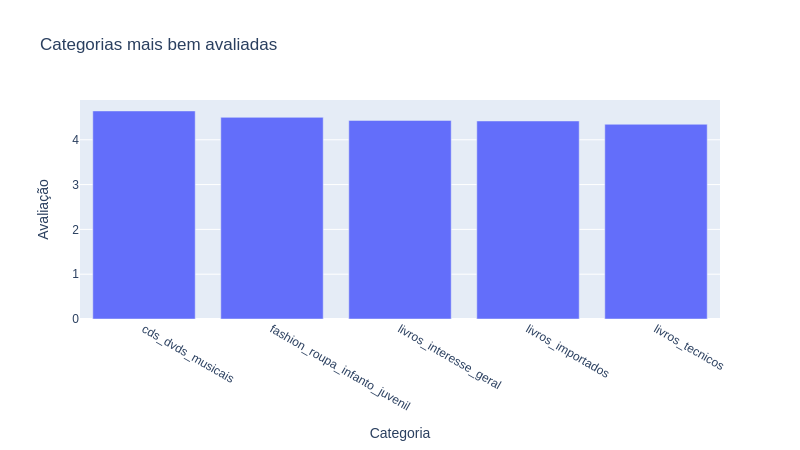

In [414]:
fig = px.bar(df_res, y = 'review_score', title='Categorias mais bem avaliadas', 
             labels={'review_score':'Avaliação','product_category_name':'Categoria'})
gitly.show(fig)

## Tempo médio de entrega por categoria (5+ rápidas)

In [415]:
df_res = df_compra_prods_reviews_pag[['product_category_name', 'days_delivery_interval']].groupby(by='product_category_name').mean()
df_res = df_res.sort_values(by = 'days_delivery_interval').head(5)
df_res

,days_delivery_interval
product_category_name,
artes_e_artesanato,5.291667
la_cuisine,7.250000
livros_importados,8.048387
portateis_cozinha_e_preparadores_de_alimentos,8.066667
artigos_de_festas,8.739130


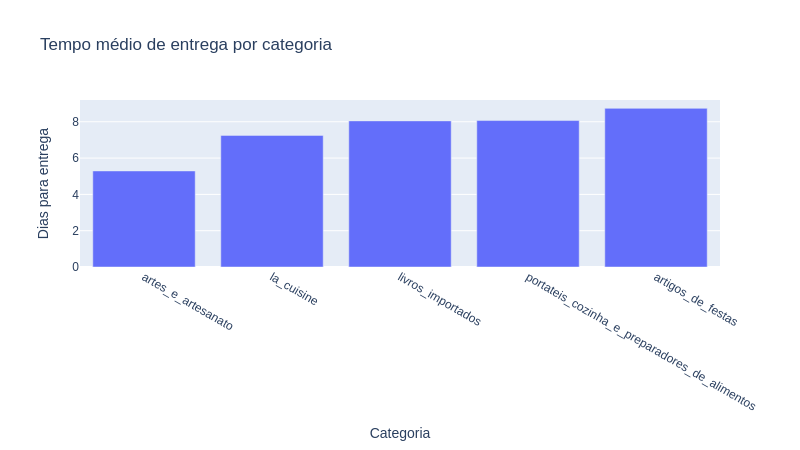

In [416]:
fig = px.bar(df_res, y = 'days_delivery_interval', title='Tempo médio de entrega por categoria', 
             labels={'days_delivery_interval':'Dias para entrega','product_category_name':'Categoria'})
gitly.show(fig)

## Média de parcelas por vendedor (5 maiores)

In [417]:
df_res = df_compra_prods_reviews_pag[['seller_id', 'payment_installments']].groupby(by='seller_id').mean()
df_res = df_res.sort_values(by = 'payment_installments', ascending=False).head(5)
df_res

,payment_installments
seller_id,
9b1585752613ec342d03bbab9997ec48,13.333333
4fb41dff7c50136976d1a5cf004a42e2,12.666667
1fe61aa5494bd3ae92a2c13e067c810f,12.500000
458c6fa920810ce2492da71bc26d9eec,12.500000
c747d5b92c7648417faea95d36d763e8,12.000000


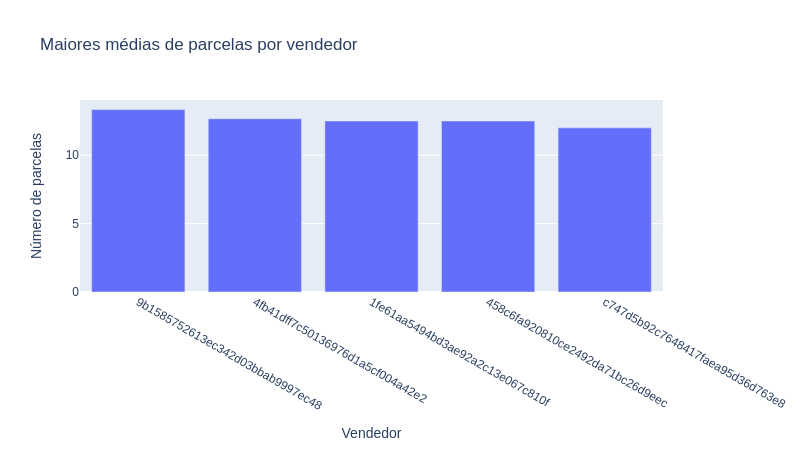

In [418]:
fig = px.bar(df_res, y = 'payment_installments', title='Maiores médias de parcelas por vendedor', 
             labels={'payment_installments':'Número de parcelas','seller_id':'Vendedor'})
gitly.show(fig)

## Média de parcelas por categoria (5 maiores)

In [419]:
df_res = df_compra_prods_reviews_pag[['product_category_name', 'payment_installments']].groupby(by='product_category_name').mean()
df_res = df_res.sort_values(by = 'payment_installments', ascending=False).head(5)
df_res

,payment_installments
product_category_name,
pcs,6.009091
portateis_casa_forno_e_cafe,5.487179
la_cuisine,4.250000
eletrodomesticos_2,4.110701
moveis_sala,4.020677


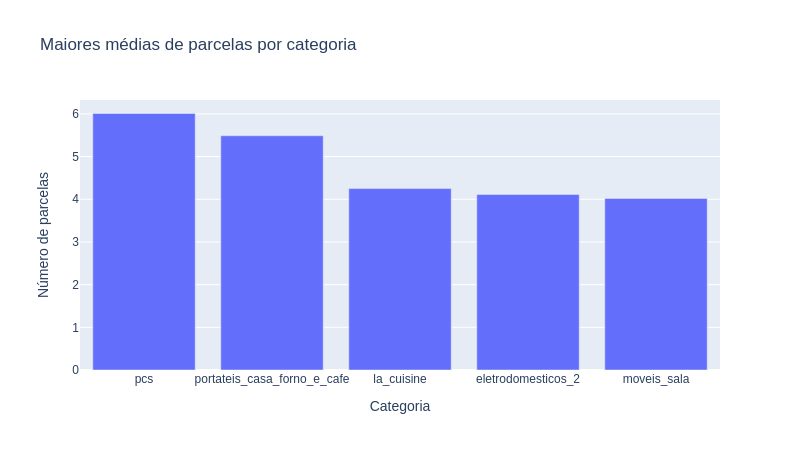

In [420]:
fig = px.bar(df_res, y = 'payment_installments', title='Maiores médias de parcelas por categoria', 
             labels={'payment_installments':'Número de parcelas','product_category_name':'Categoria'})
gitly.show(fig)